In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv('car data.xls')
df['Fuel_Type']=df['Fuel_Type'].astype("category")
df['Seller_Type']=df['Seller_Type'].astype("category")
df['Transmission']=df['Transmission'].astype("category")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.dtypes

Car_Name           object
Year                int64
Selling_Price     float64
Present_Price     float64
Kms_Driven          int64
Fuel_Type        category
Seller_Type      category
Transmission     category
Owner               int64
dtype: object

In [4]:
print("Fuel Type", end=" ")
print(df.Fuel_Type.unique())
print("Seller Type", end=" ")
print(df.Seller_Type.unique())
print("Transmission Type", end=" ")
print(df.Transmission.unique())
print("Owner Type", end=" ")
print(df.Owner.unique())

Fuel Type ['Petrol', 'Diesel', 'CNG']
Categories (3, object): ['CNG', 'Diesel', 'Petrol']
Seller Type ['Dealer', 'Individual']
Categories (2, object): ['Dealer', 'Individual']
Transmission Type ['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']
Owner Type [0 1 3]


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df['Years_Old']=datetime.date.today().year-df['Year']

In [8]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True,dtype=int)
df.drop(['Car_Name','Year'],axis=1,inplace=True)

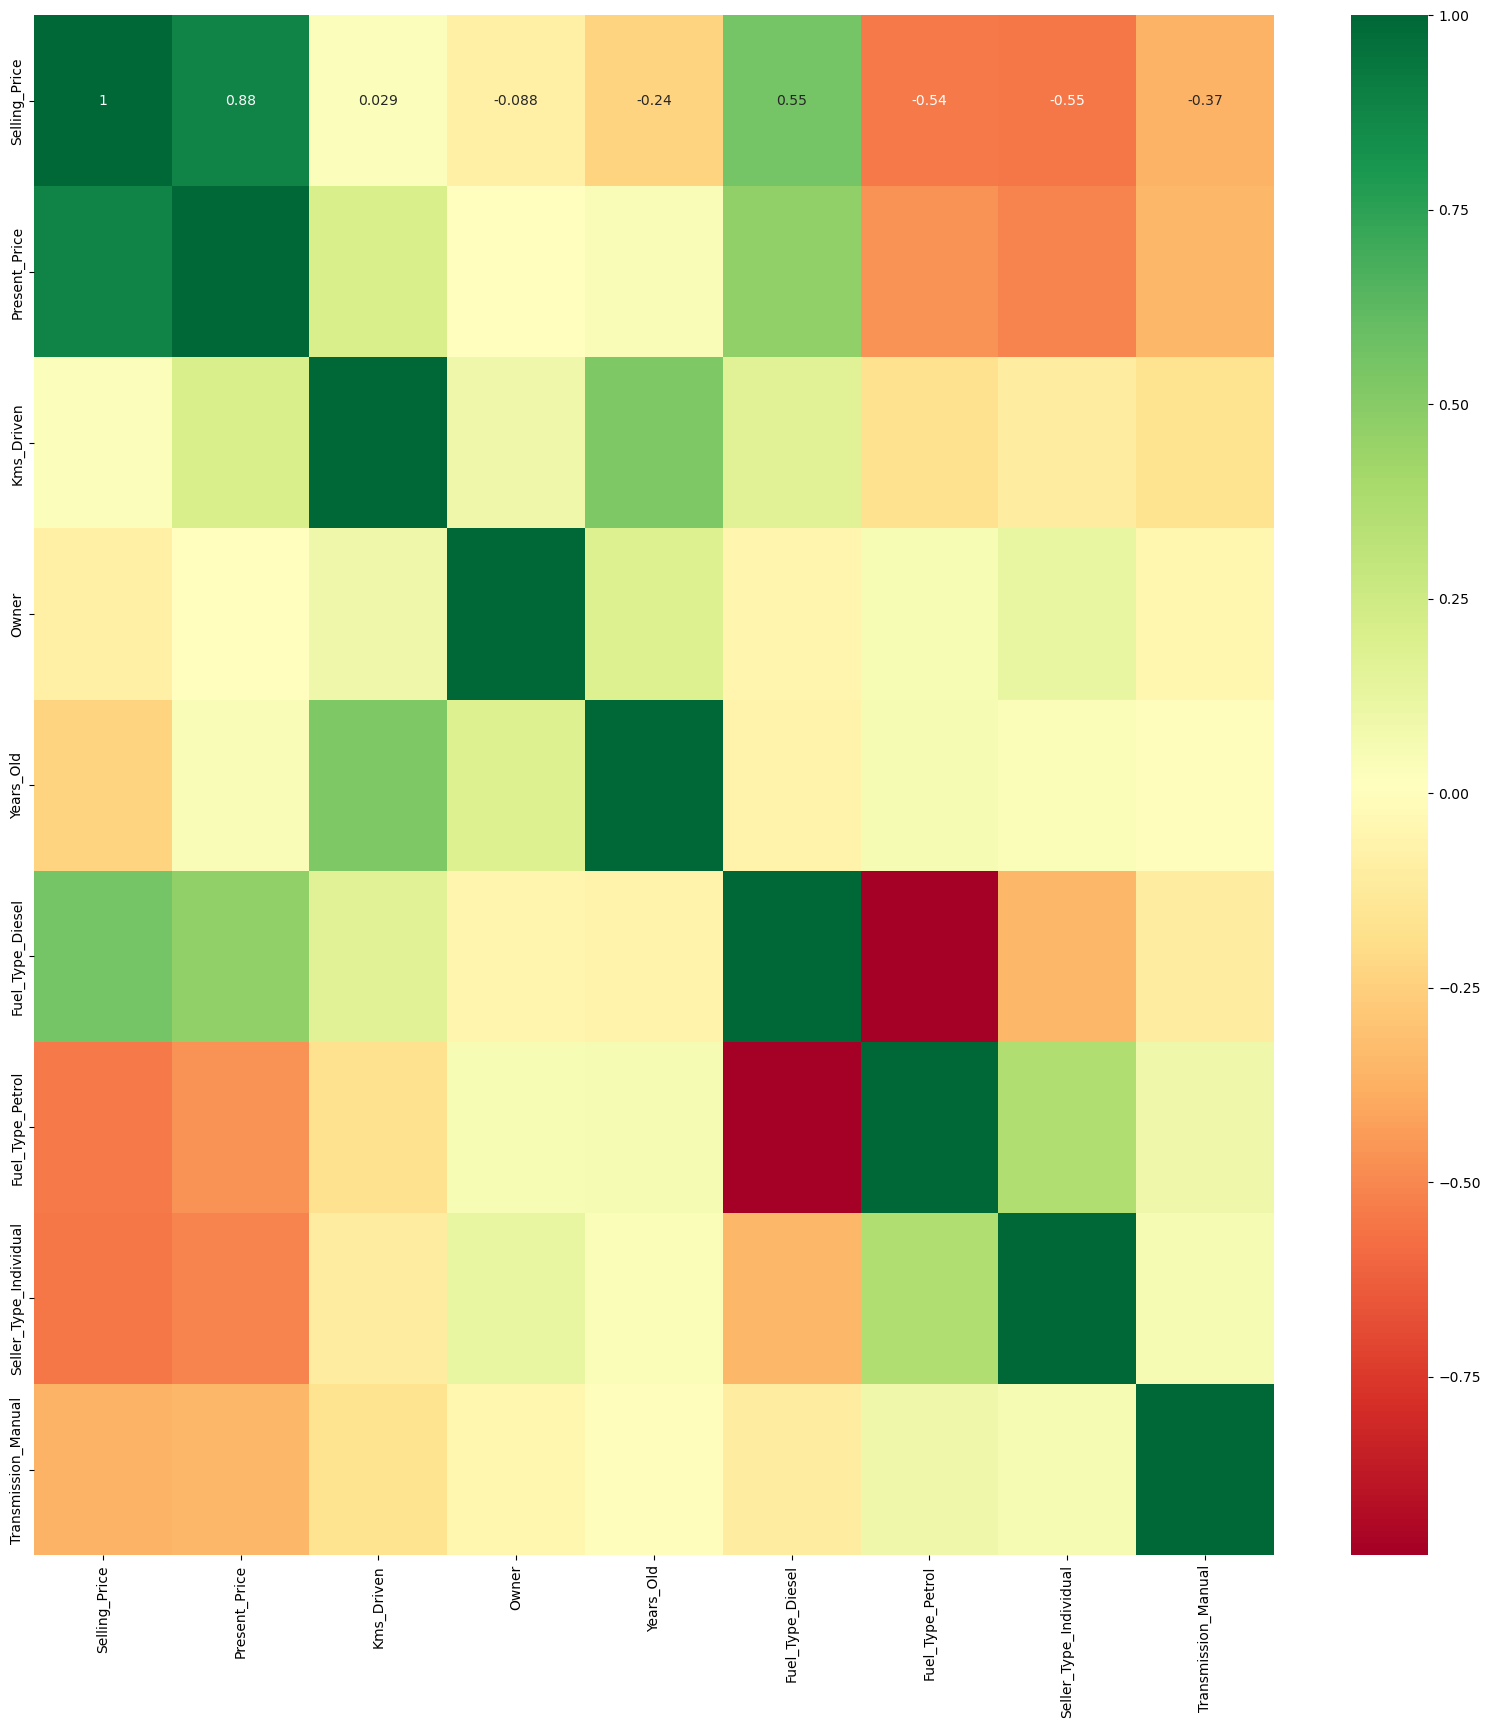

In [9]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# X=df.iloc[:,1:]
# Y=df.iloc[:,0]

In [11]:
X,test,Y,result=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=42)

In [12]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)

In [13]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# max_features = ['sqrt']
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]

In [14]:
# best_model=None
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# regr=RandomizedSearchCV(RandomForestRegressor(), param_grid,scoring='neg_mean_squared_error',cv=5,n_iter = 10,n_jobs=1)
# regr.fit(X,Y)
# predictions=regr.predict(test)
# print('Mean Absolute Error:', mean_absolute_error(result, predictions))
# print('Mean Square Error:', mean_squared_error(result, predictions))
# print('Root Mean Square Error:', np.sqrt(mean_squared_error(result, predictions)))

In [15]:
best_model=None
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb=RandomizedSearchCV(XGBRegressor(), param_grid,scoring='neg_mean_squared_error',cv=5,n_iter = 10,n_jobs=1)
xgb.fit(X,Y)
predictions=xgb.predict(test)
print('Mean Absolute Error:', mean_absolute_error(result, predictions))
print('Mean Square Error:', mean_squared_error(result, predictions))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(result, predictions)))

C:\Users\palan\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mean Absolute Error: 0.5091227874794945
Mean Square Error: 0.7252949622973501
Root Mean Square Error: 0.8516425085077366


In [16]:
# # open a file, where you ant to store the data
# file = open('random_forest_regression_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(regr, file)

In [17]:
with open('xgboost_regression_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)